这个单元格给助教，请忽略!

### Score:

### Comment: 

请实现每个 function 内容，确保最终提交的notebook是可以运行的。

每一题除了必须要报告的 输出/图表，可以添加解释（中文即可）。此外可以自定义其他 function / 变量，自由添加单元格，但请确保题目中给出的 function （如第一题的 Print_values）可以正常调用。

**Collaboration:**  

Collaboration on solving the assignment is allowed, after you have thought about the problem sets on your own. It is also OK to get clarification (but not solutions) from online resources, again after you have thought about the problem sets on your own. 

There are two requirements for collaboration: 

* Cite your collaborators **fully and completely** (*e.g.*, "XXX explained to me what is asked in problem set 3"). Or cite online resources (*e.g.*, "I got inspired by reading XXX") that helped you.

* Write your scripts and report **independently** - the scripts and report must come from you only.

# 1. Global methane levels from 2002 

Methane (CH4) is a naturally occurring Greenhouse Gas (GHG), but one whose abundance has been increased substantially above its pre-industrial value by human activities, primarily because of agricultural emissions (e.g., rice production, ruminants) and fossil fuel production and use. A clear annual cycle is largely due to seasonal wetland emissions.

Atmospheric methane abundance is indirectly observed by various satellite instruments. These instruments measure spectrally resolved near-infrared and infrared radiation reflected or emitted by the Earth and its atmosphere. In the measured signal, molecular absorption signatures from methane and constituent gasses can be identified. It is through analysis of those absorption lines in these radiance observations that the averaged methane abundance in the sampled atmospheric column can be determined.

For this problem set, methane levels have been determined by applying several algorithms to different satellite instruments. Download the netCDF4 file (200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc) here, which contains monthly-averaged methane levels (xch4) in the unit of ppb at each 5° (lon) x 5° (lat) grid over the globe from 2003-01 to 2020-06.

1.1 [5 points] Compute methane climatology for each month, and plot your results in 12 panels.

In [37]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Load the NetCDF data
data = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc",engine = "netcdf4")
# Display the data variables to understand its structure
data

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

C:\Users\Wang XK\AppData\Local\Temp\ipykernel_15400\3893111669.py:15: RuntimeWarning: Mean of empty slice
  climatology_np[month - 1] = np.nanmean(xch4_values[month_indices, :, :], axis=0)


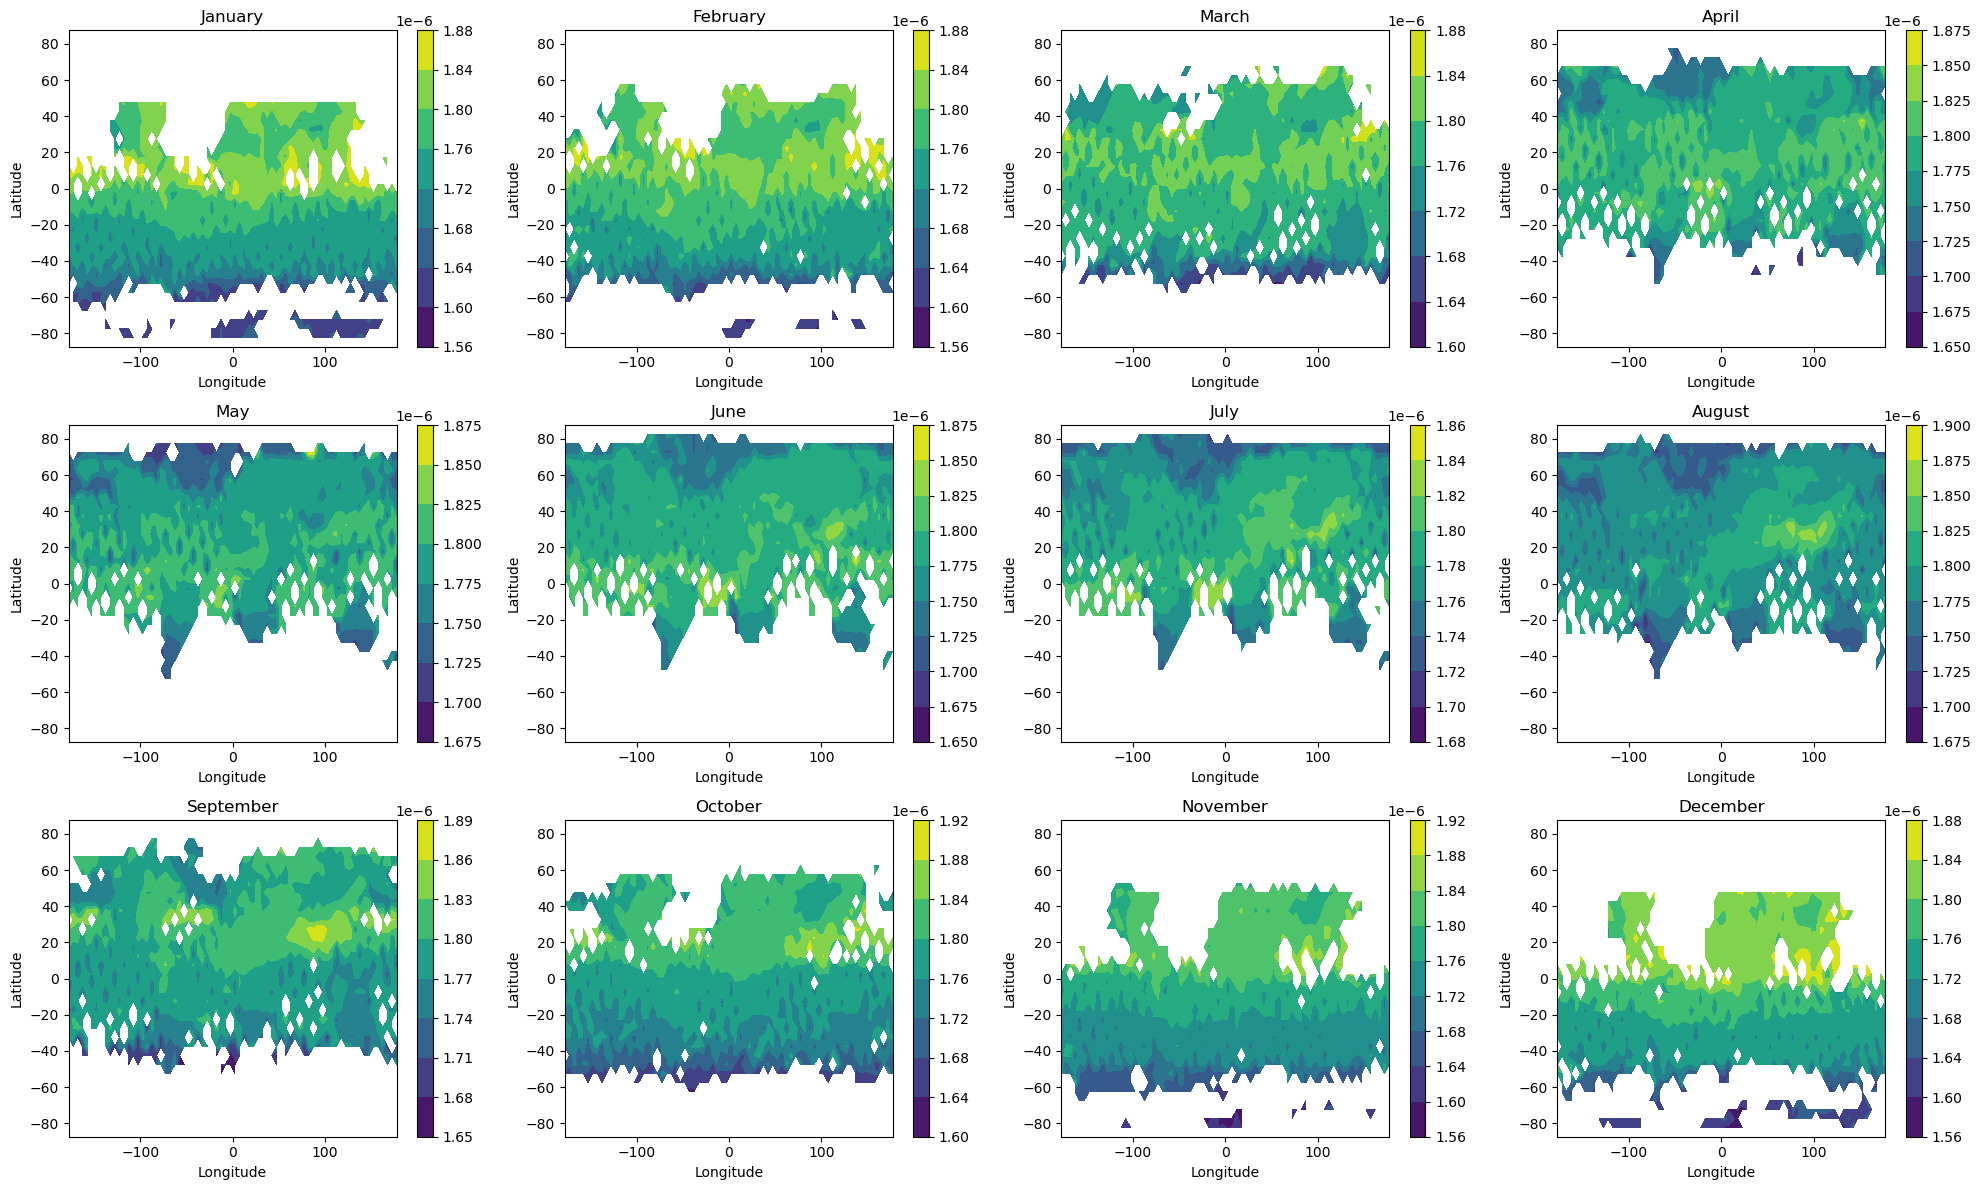

In [38]:
# Extract methane (xch4) and time information
xch4 = data['xch4']
time = data['time']

# Calculate monthly climatology by grouping by month across all years
monthly_climatology = xch4.groupby("time.month").mean(dim="time")
# Convert the dataset to a NumPy array for grouping operations
xch4_values = xch4.values
time_months = data['time.month'].values
# Compute climatology using NumPy
climatology_np = np.zeros((12, xch4.shape[1], xch4.shape[2]))

for month in range(1, 13):
    month_indices = np.where(time_months == month)[0]
    climatology_np[month - 1] = np.nanmean(xch4_values[month_indices, :, :], axis=0)

# Plot the climatology in 12 panels
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

for i, ax in enumerate(axes.flat):
    c = ax.contourf(data['lon'], data['lat'], climatology_np[i], cmap='viridis')
    fig.colorbar(c, ax=ax)
    ax.set_title(months[i])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

1.2 [5 points] Plot globally-averaged methane from 2003-01 to 2020-06 as a time series. Describe your results. Check your plot with this one.

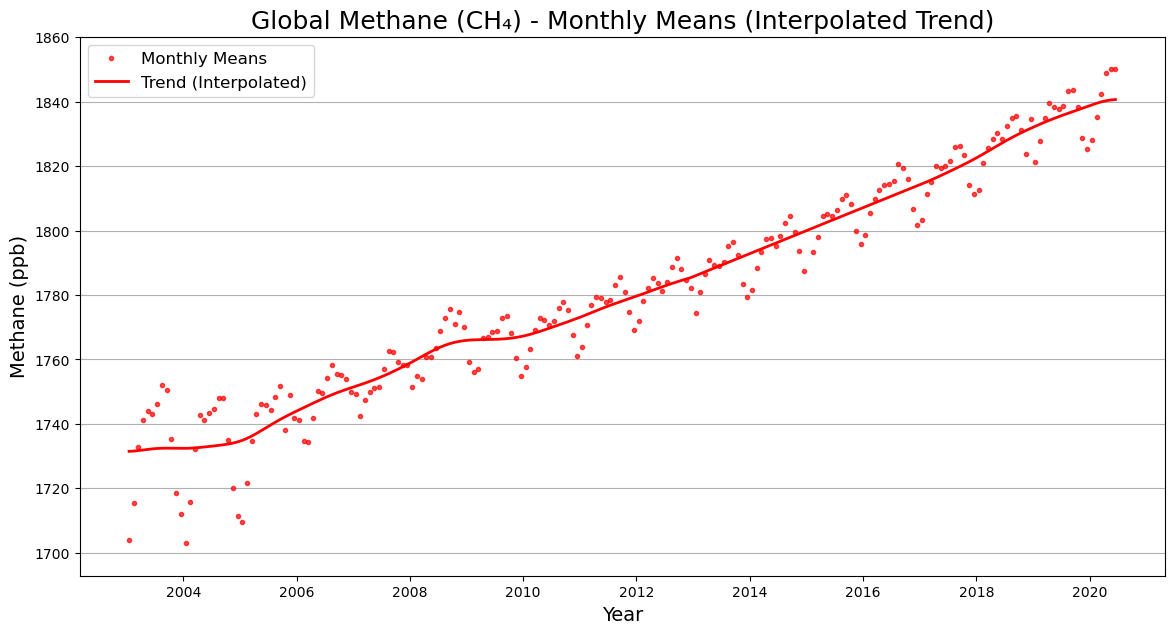

In [36]:
from scipy.ndimage import gaussian_filter1d

# Calculate global average methane levels by averaging over lat and lon dimensions for each time point
global_avg_methane = xch4.mean(dim=["lat", "lon"])

# Convert methane levels from fraction to ppb
global_mean_methane_ppb_corrected = global_avg_methane * 1e9  # Convert to ppb
smoothed_methane_ppb_corrected = gaussian_filter1d(global_mean_methane_ppb_corrected, sigma=6)

# Convert to numpy array and ensure valid numerical values
smoothed_trend_array = np.array(smoothed_methane_ppb_corrected)
valid_indices = np.isfinite(smoothed_trend_array)
interpolated_trend = np.interp(np.arange(len(smoothed_trend_array)),np.flatnonzero(valid_indices),smoothed_trend_array[valid_indices])
# Recreate the plot with interpolated trend values
plt.figure(figsize=(14, 7))
plt.plot(data["time"], global_mean_methane_ppb_corrected, 'r.', label="Monthly Means", alpha=0.7)
plt.plot(data["time"], interpolated_trend, 'r-', label="Trend (Interpolated)", linewidth=2)
#plt.fill_between(data["time"],interpolated_trend.min()-10, interpolated_trend, color='pink',alpha=0.3)

plt.title("Global Methane (CH₄) - Monthly Means (Interpolated Trend)", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Methane (ppb)", fontsize=14)
plt.grid(axis='y')
plt.legend(fontsize=12, loc="upper left")
plt.ylim(global_mean_methane_ppb_corrected.min() - 10, global_mean_methane_ppb_corrected.max() + 10)
plt.show()


The plot shows the globally-averaged methane levels from January 2003 to June 2020. Methane levels exhibit a clear upward trend over time, indicating an increase in atmospheric methane concentration during this period. Additionally, there is a noticeable seasonal cycle superimposed on the long-term trend, likely driven by seasonal variations in sources like wetlands and agricultural activities.

1.3 [5 points] Plot deseasonalized methane levels at point [15°S, 150°W] from 2003-01 to 2020-06 as a time series. Describe your results.

D:\Anaconda\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\Anaconda\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


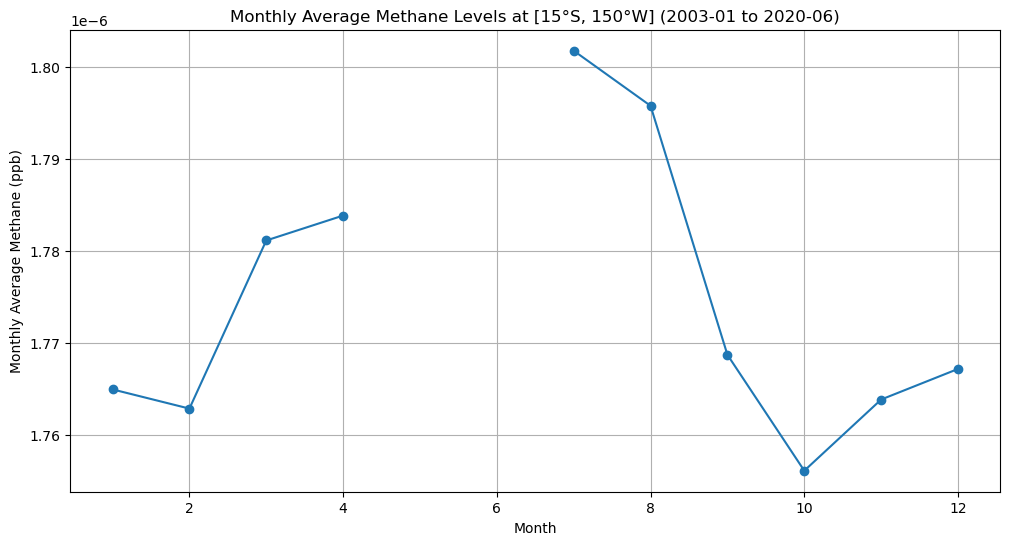

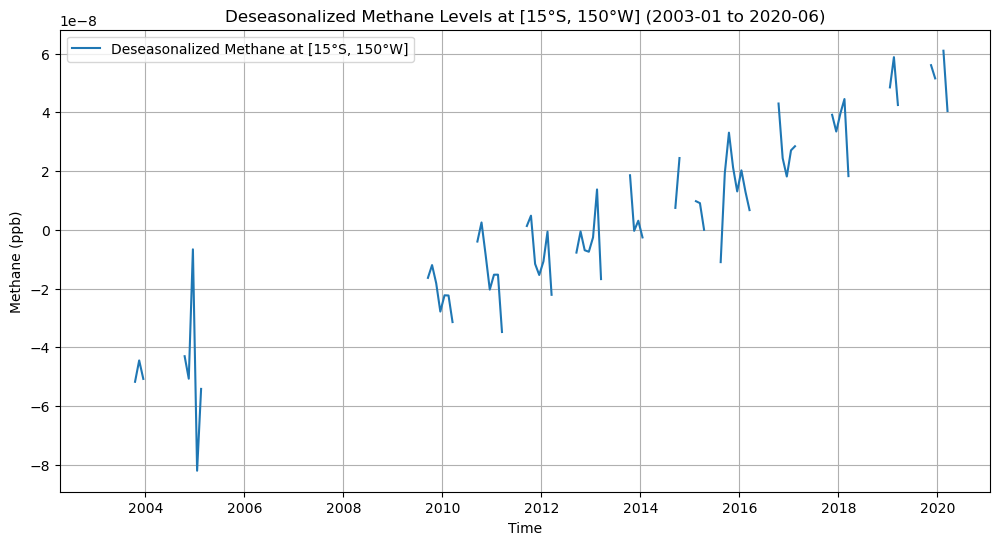

In [47]:
# Extract methane levels at the specific location [15°S, 150°W]
location_methane = xch4.sel(lat=-15, lon=-150, method="nearest")

# Deseasonalize by removing the monthly mean (climatology) for each month
location_monthly_climatology = location_methane.groupby("time.month").mean(dim="time")
deseasonalized_methane = location_methane.groupby("time.month") - location_monthly_climatology

# Plot the Monthly average methane levels
plt.figure(figsize=(12, 6))
location_monthly_climatology.plot(marker='o')
plt.xlabel("Month")
plt.ylabel("Monthly Average Methane (ppb)")
plt.title("Monthly Average Methane Levels at [15°S, 150°W] (2003-01 to 2020-06)")
plt.grid(True)
plt.show()

# Plot the deseasonalized methane levels
plt.figure(figsize=(12, 6))
plt.plot(time, deseasonalized_methane, label="Deseasonalized Methane at [15°S, 150°W]")
plt.xlabel("Time")
plt.ylabel("Methane (ppb)")
plt.title("Deseasonalized Methane Levels at [15°S, 150°W] (2003-01 to 2020-06)")
plt.legend()
plt.grid(True)
plt.show()


The deseasonalized methane levels at the specified location[15°S,150°W]are shown. By removing the seasonal cycle, the underlying trends and variations in methane levels become more apparent. The plot reveals an overall increase in methane concentrations over time, with fluctuations that could be attributed to local or regional variations in emissions or atmospheric transport mechanisms.

[ 可以在这里添加第一题解释 ]

# 2. Niño 3.4 index

The Niño 3.4 anomalies may be thought of as representing the average equatorial sea surface temperatures (SSTs) across the Pacific from about the dateline to the South American coast (5N-5S, 170W-120W). The Niño 3.4 index typically uses a 3-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed +/- 0.5°C for a period of 5 months or more. Check Equatorial Pacific Sea Surface Temperatures for more about the Niño 3.4 index.

In this problem set, you will use the sea surface temperature (SST) data from NOAA. Download the netCDF4 file (NOAA_NCDC_ERSST_v3b_SST.nc) here.

2.1 [10 points] Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [48]:
import xarray as xr

# Load the SST data from the provided netCDF4 file
data = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')

# Display the variables and structure of the dataset to understand the available data
data
# Define Niño 3.4 region bounds
lat_bounds = (-5, 5)    # 5N to 5S
lon_bounds = (170, 240) # 170W to 120W (shifted 360 degrees for global coordinates)

# Extract SST data for the Niño 3.4 region within the specified latitude and longitude bounds
nino34_sst = data.sst.sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))

# Calculate the monthly climatology (mean for each month over the available years)
nino34_climatology = nino34_sst.groupby("time.month").mean(dim="time")

# Subtract the climatology from the SST time series to obtain anomalies
nino34_anomalies = nino34_sst.groupby("time.month") - nino34_climatology

# Average over the spatial dimensions (lat, lon) to get a single time series for Niño 3.4
nino34_index = nino34_anomalies.mean(dim=["lat", "lon"])

nino34_index.head()


<xarray.DataArray 'sst' (time: 5)>
array([-0.38234517, -0.54647094, -0.364311  , -0.28806007, -0.22838712],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 1960-05-15
    month    (time) int64 1 2 3 4 5

2.2 [10 points] Visualize the computed Niño 3.4. Your plot should look similar to this one.

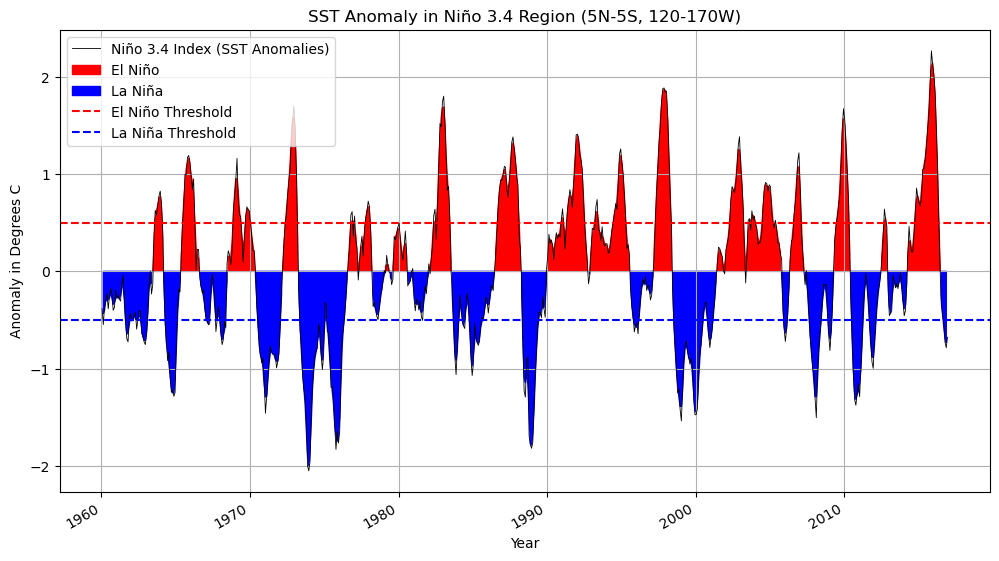

In [49]:
# Smooth the Niño 3.4 index to a 3-month running mean to match the reference
nino34_smoothed = nino34_index.rolling(time=3, center=True).mean()

# Visualizing the anomalies similar to the reference plot
plt.figure(figsize=(12, 6))
nino34_index.plot(label="Niño 3.4 Index (SST Anomalies)", color="black",linewidth=0.6)
plt.fill_between(nino34_smoothed.time.values, nino34_smoothed, 0,
                 where=nino34_smoothed >= 0, color='red', label="El Niño")
plt.fill_between(nino34_smoothed.time.values, nino34_smoothed, 0,
                 where=nino34_smoothed < 0, color='blue', label="La Niña")

# Add El Niño and La Niña thresholds
plt.axhline(0.5, color="red", linestyle="--", label="El Niño Threshold")
plt.axhline(-0.5, color="blue", linestyle="--", label="La Niña Threshold")

# Customization for clarity
plt.title("SST Anomaly in Niño 3.4 Region (5N-5S, 120-170W)")
plt.ylabel("Anomaly in Degrees C")
plt.xlabel("Year")
plt.legend()
plt.grid()

plt.show()

[ 可以在这里添加第二题解释 ]

# 3. Explore a netCDF dataset

Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format, and have temporal information.

https://disc.gsfc.nasa.gov/datasets?page=4&subject=Atmospheric%20Temperature,Atmospheric%20Pressure,Atmospheric%20Chemistry,Aerosols,Air%20Quality,Ground%20Water,Ecological%20Dynamics,Frozen%20Ground
The dataset is called "Global methane fluxes optimized with GOSAT data for 2010-2018"
网址：https://disc.gsfc.nasa.gov/datasets/CMSGCH4F_1/summary
数据文件见附件-"GlobalInv_GOSAT_CH4Flux_2010-2018_v1.nc"

3.1 [5 points] Plot a time series of a certain variable with monthly seasonal cycle removed.

In [50]:
# Load the NetCDF data
dataset = xr.open_dataset("GlobalInv_GOSAT_CH4Flux_2010-2018_v1.nc",engine = "netcdf4")

# Display the data variables to understand its structure
dataset

<xarray.Dataset>
Dimensions:                (lon: 72, lat: 46, wetland_region: 14, time: 108)
Coordinates:
  * lon                    (lon) float64 -180.0 -175.0 -170.0 ... 170.0 175.0
  * lat                    (lat) float64 -89.0 -86.0 -82.0 ... 82.0 86.0 89.0
  * wetland_region         (wetland_region) int32 1 2 3 4 5 6 ... 10 11 12 13 14
  * time                   (time) datetime64[ns] 2010-01-01 ... 2018-12-01
Data variables:
    area                   (lat, lon) float32 ...
    prior_nonwetland       (lat, lon) float32 ...
    post_nonwetland        (lat, lon) float32 ...
    post_nonwetland_trend  (lat, lon) float32 ...
    prior_wetland          (time, wetland_region) float32 ...
    post_wetland           (time, wetland_region) float32 ...
Attributes: (12/19)
    title:                          Global methane fluxes optimized with GOSA...
    history:                        Created on 2021-03-23
    institution:                    Harvard University, Westlake University
    contact:                        Yuzhong Zhang (zhangyuzhong@westlake.edu.cn)
    description:                    Prior and posterior estimates of methane ...
    GranuleID:                      GlobalInv_GOSAT_CH4Flux_2010-2018_v1.nc
    ...                             ...
    references:                     Zhang et al., Attribution of the accelera...
    Format:                         netcdf
    IdentifierProductDOIAuthority:  http://dx.doi.org/
    IdentifierProductDOI:           10.5067/FPKC6Q6SGWE0
    ProductionDateTime:             2021-03-23
    ProcessingLevel:                4.0

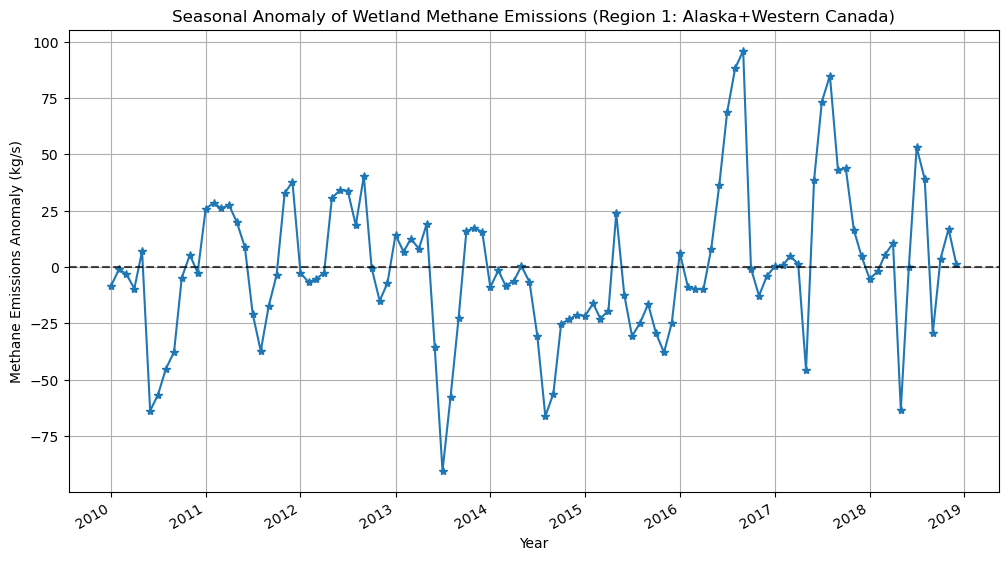

In [70]:
import matplotlib.pyplot as plt

# Inspect the wetland_region values to determine valid indices
wetland_regions = dataset["wetland_region"].values
wetland_regions
# Select data for the first wetland region (region 1: Alaska+Western Canada)
region_data = dataset["post_wetland"].sel(wetland_region=1)

# Compute the climatology and anomaly for the selected region
region_climatology = region_data.groupby("time.month").mean(dim="time")
region_anomaly = region_data.groupby("time.month") - region_climatology

# Plot the seasonal anomaly time series for the selected region
plt.figure(figsize=(12, 6))
region_anomaly.plot(marker="*")
plt.axhline(0, color="k", linestyle="--", alpha=0.7)
plt.title("Seasonal Anomaly of Wetland Methane Emissions (Region 1: Alaska+Western Canada)")
plt.xlabel("Year")
plt.ylabel("Methane Emissions Anomaly (kg/s)")
plt.grid()
plt.show()


The wetland_region values range from 1 to 14. Region 1 (Alaska+Western Canada)is selected for analysis in 3.1

3.2 [10 points] Make at least 5 different plots using the dataset.

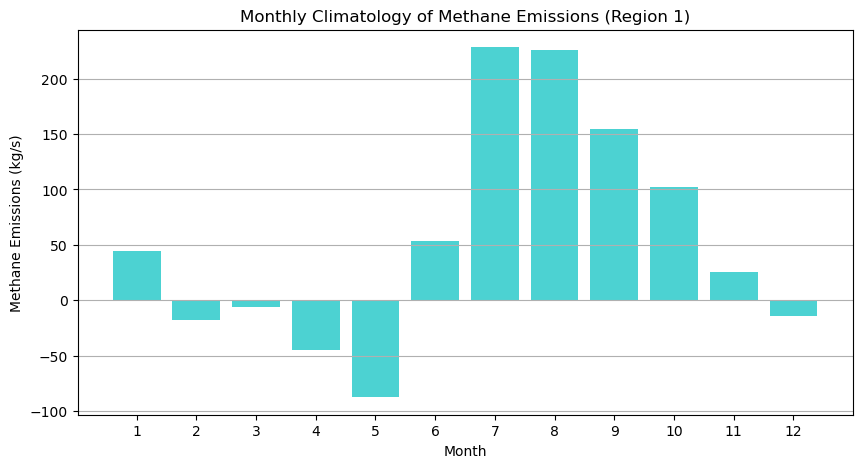

In [73]:
# 1. Climatology (average monthly cycle) for Region 1
plt.figure(figsize=(10, 5))
plt.bar(range(1, 13), region_climatology, color="c", alpha=0.7)
plt.title("Monthly Climatology of Methane Emissions (Region 1)")
plt.xlabel("Month")
plt.ylabel("Methane Emissions (kg/s)")
plt.xticks(range(1, 13))
plt.grid(axis="y")
plt.show()

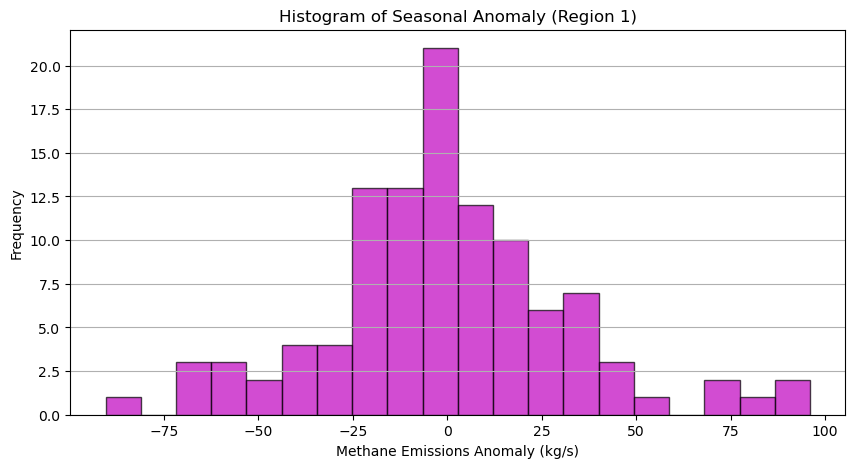

In [75]:
# 2. Histogram of the seasonal anomaly
plt.figure(figsize=(10, 5))
plt.hist(region_anomaly, bins=20, color="m", alpha=0.7, edgecolor="k")
plt.title("Histogram of Seasonal Anomaly (Region 1)")
plt.xlabel("Methane Emissions Anomaly (kg/s)")
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()

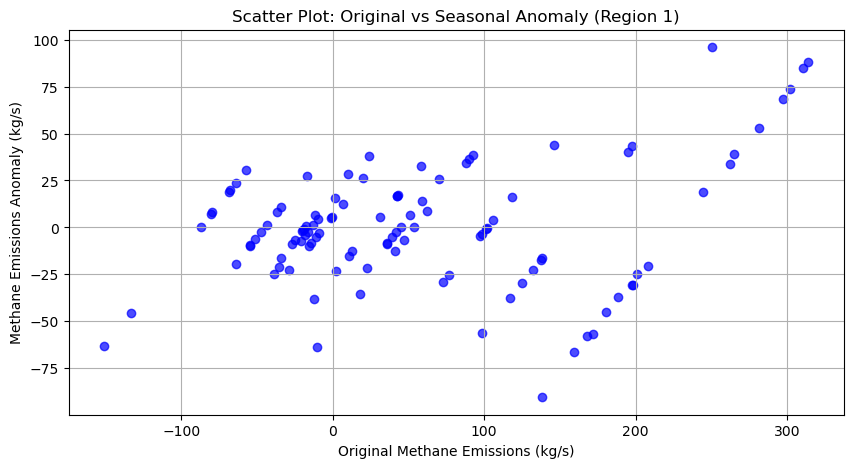

In [76]:
# 3. Scatter plot of original vs anomaly (for insights on variability)
plt.figure(figsize=(10, 5))
plt.scatter(region_data, region_anomaly, alpha=0.7, color="b")
plt.title("Scatter Plot: Original vs Seasonal Anomaly (Region 1)")
plt.xlabel("Original Methane Emissions (kg/s)")
plt.ylabel("Methane Emissions Anomaly (kg/s)")
plt.grid()
plt.show()

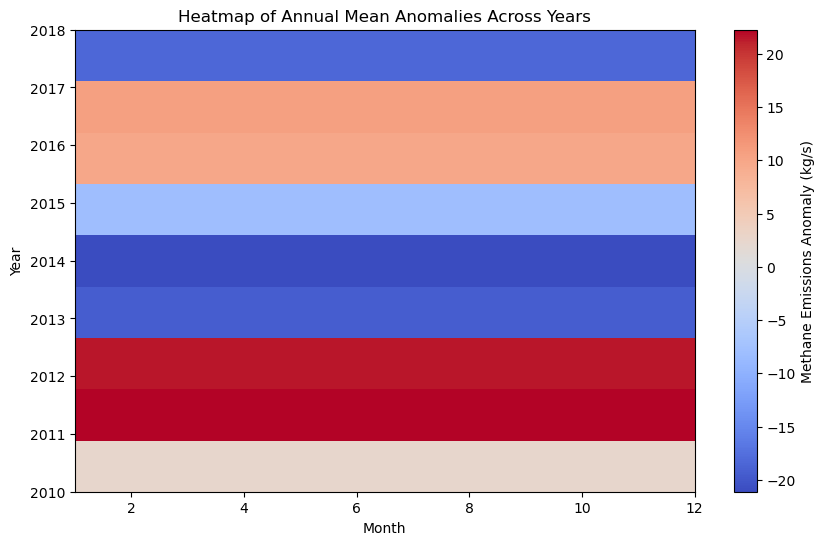

In [77]:
# 4. Heatmap of monthly climatology across years (if applicable)
monthly_anomalies = region_anomaly.groupby("time.year").mean(dim="time")
plt.figure(figsize=(10, 6))
plt.imshow(
    monthly_anomalies.values[:, None],
    aspect="auto",
    cmap="coolwarm",
    interpolation="none",
    extent=[1, 12, 2010, 2018],
)
plt.colorbar(label="Methane Emissions Anomaly (kg/s)")
plt.title("Heatmap of Annual Mean Anomalies Across Years")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


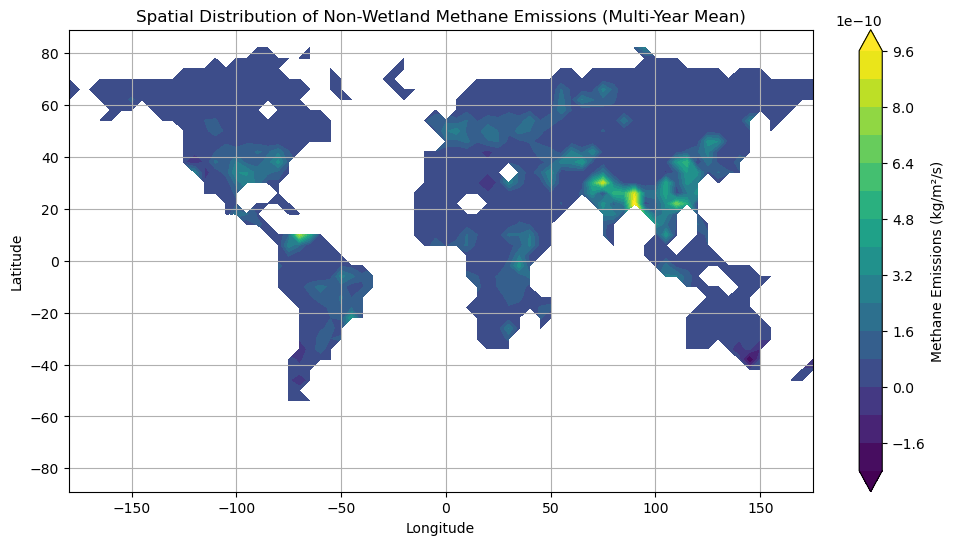

In [80]:
# 5.Plot spatial distribution of multi-year mean non-wetland methane emissions
plt.figure(figsize=(12, 6))
plt.contourf(
    dataset["lon"], dataset["lat"], dataset["post_nonwetland"],
    cmap="viridis", levels=20, extend="both"
)
plt.colorbar(label="Methane Emissions (kg/m²/s)")
plt.title("Spatial Distribution of Non-Wetland Methane Emissions (Multi-Year Mean)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

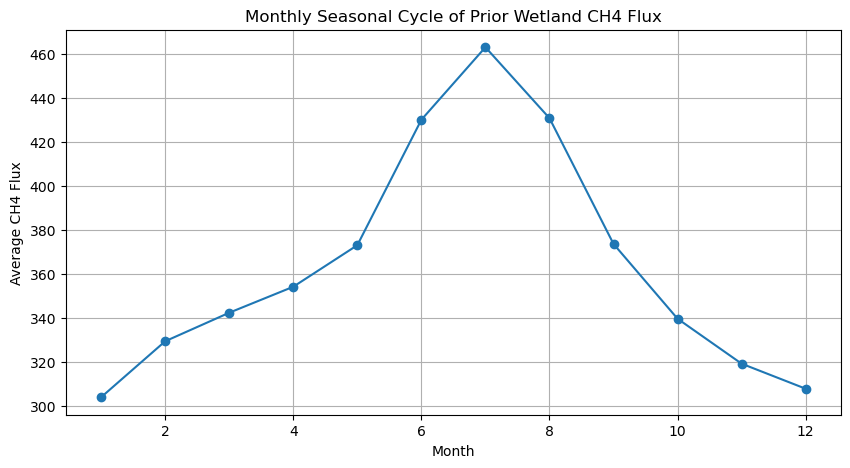

In [82]:
# 6. Plot seasonal cycle for `prior_wetland`, averaging across years to show the monthly cycle
monthly_cycle_prior_wetland = prior_wetland.groupby("time.month").mean("time").mean(dim="wetland_region")
plt.figure(figsize=(10, 5))
monthly_cycle_prior_wetland.plot(marker='o')
plt.title('Monthly Seasonal Cycle of Prior Wetland CH4 Flux')
plt.xlabel('Month')
plt.ylabel('Average CH4 Flux')
plt.grid(True)
plt.show()

[ 可以在这里添加第三题解释 ]